In [1]:
!pip install yfinance

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# for graphs
import matplotlib.pyplot as plt


# Module 2 Homework

In this homework, we're going to combine data from various sources to process it in Pandas and generate additional fields.

If not stated otherwise, please use the [Colab](https://github.com/DataTalksClub/stock-markets-analytics-zoomcamp/blob/main/02-dataframe-analysis/Module2_Colab_Working_with_the_data.ipynb) covered at the livestream to re-use the code snippets.



---

## Question 1: IPO Filings Web Scraping and Data Processing



**What's the total sum ($m) of 2023 filings that happened on Fridays?**

1. Re-use the [Code Snippet 1] example to get the data from web for this endpoint: https://stockanalysis.com/ipos/filings/
1. Convert the 'Filing Date' to datetime(), 'Shares Offered' to float64 (if '-' is encountered, populate with NaNs).
1. Define a new field 'Avg_price' based on the "Price Range", which equals to NaN if no price is specified, to the price (if only one number is provided), or to the average of 2 prices (if a range is given).
You may be inspired by the function `extract_numbers()` in [Code Snippet 4], or you can write your own function to "parse" a string.
1. Define a column "Shares_offered_value", which equals to "Shares Offered" * "Avg_price" (when both columns are defined; otherwise, it's NaN)

1. Find the total sum in $m (millions of USD, closest INTEGER number) for all filings during 2023, which happened on Fridays (`Date.dt.dayofweek()==4`). You should see 32 records in total, 25 of it is not null.

(additional: you can read about [S-1 IPO filing](https://www.dfinsolutions.com/knowledge-hub/thought-leadership/knowledge-resources/what-s-1-ipo-filing) to understand the context)

---

In [3]:
import pandas as pd
import requests

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
}

# url = "https://stockanalysis.com/ipos/2023/"
url = "https://stockanalysis.com/ipos/filings/"
response = requests.get(url, headers=headers)

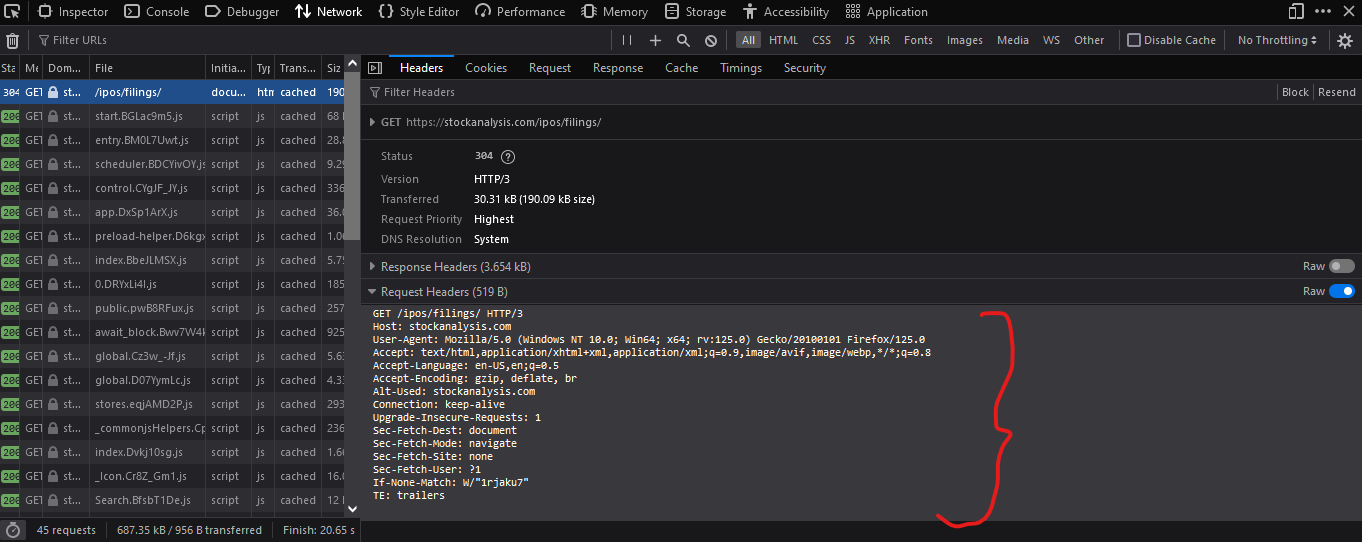

In [4]:
response.text

'<!doctype html>\n<html lang="en">\n\t<head>\n\t\t<meta charset="utf-8" />\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1" />\n\t\t\n\t\t<link href="../../_app/immutable/assets/0.CsUeg04J.css" rel="stylesheet">\n\t\t<link href="../../_app/immutable/assets/___StockTable.BVNI3pnz.css" rel="stylesheet"><title>IPO Filings - Stock Analysis</title><!-- HEAD_svelte-1xs9uv8_START --><script defer data-api="/cfa/event/" data-domain="stockanalysis.com" event-is_logged_in="false" event-is_pro="false" src="/cfa/js/script.js"></script><script data-svelte-h="svelte-s6v612">window.plausible =\n\t\t\twindow.plausible ||\n\t\t\tfunction () {\n\t\t\t\t;(window.plausible.q = window.plausible.q || []).push(arguments)\n\t\t\t}\n\t</script><!-- HEAD_svelte-1xs9uv8_END --><!-- HEAD_svelte-1m45x84_START --><meta name="description" content="A list of all stocks that have filed for an initial public offering (IPO) on the US stock market, but have not set an estimated IPO date yet."><lin

In [5]:
ipo_filings_list = pd.read_html(response.text)

In [6]:
len(ipo_filings_list), type(ipo_filings_list)

(2, list)

In [7]:
print(f'\n{ipo_filings_list[0].head()} \n {ipo_filings_list[1].head()}')


    Filing Date Symbol                           Company Name Price Range  \
0   May 3, 2024    TBN         Tamboran Resources Corporation           -   
1  Apr 29, 2024   HWEC                   HW Electro Co., Ltd.       $3.00   
2  Apr 29, 2024   DTSQ  DT Cloud Star Acquisition Corporation      $10.00   
3  Apr 26, 2024   EURK                Eureka Acquisition Corp      $10.00   
4  Apr 26, 2024    HDL    Super Hi International Holding Ltd.           -   

  Shares Offered  
0              -  
1        3750000  
2        6000000  
3        5000000  
4              -   
      Date Symbol                                  Name
0  May 10     ZK  ZEEKR Intelligent Technology Holding
1  May 10   LRTX                    Lirum Therapeutics
2  May 14    GGL                          Games Global
3  May 15   JDZG                                 Jiade
4  May 15   KDLY                             Kindly MD


In [8]:
ipo_filings = ipo_filings_list[0]
ipo_filings.head()

,Filing Date,Symbol,Company Name,Price Range,Shares Offered
0,"May 3, 2024",TBN,Tamboran Resources Corporation,-,-
1,"Apr 29, 2024",HWEC,"HW Electro Co., Ltd.",$3.00,3750000
2,"Apr 29, 2024",DTSQ,DT Cloud Star Acquisition Corporation,$10.00,6000000
3,"Apr 26, 2024",EURK,Eureka Acquisition Corp,$10.00,5000000
4,"Apr 26, 2024",HDL,Super Hi International Holding Ltd.,-,-


In [9]:
ipo_filings_list[1].head()

,Date,Symbol,Name
0,May 10,ZK,ZEEKR Intelligent Technology Holding
1,May 10,LRTX,Lirum Therapeutics
2,May 14,GGL,Games Global
3,May 15,JDZG,Jiade
4,May 15,KDLY,Kindly MD


In [10]:
ipo_filings.loc[ipo_filings['Symbol']=='TBN']

,Filing Date,Symbol,Company Name,Price Range,Shares Offered
0,"May 3, 2024",TBN,Tamboran Resources Corporation,-,-


In [11]:
ipo_filings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Filing Date     324 non-null    object
 1   Symbol          324 non-null    object
 2   Company Name    324 non-null    object
 3   Price Range     324 non-null    object
 4   Shares Offered  324 non-null    object
dtypes: object(5)
memory usage: 12.8+ KB


In [12]:
ipo_filings['Filing Date'].unique()

array(['May 3, 2024', 'Apr 29, 2024', 'Apr 26, 2024', 'Apr 22, 2024',
       'Apr 16, 2024', 'Apr 15, 2024', 'Apr 12, 2024', 'Apr 5, 2024',
       'Apr 2, 2024', 'Apr 1, 2024', 'Mar 29, 2024', 'Mar 28, 2024',
       'Mar 26, 2024', 'Mar 25, 2024', 'Mar 22, 2024', 'Mar 21, 2024',
       'Mar 15, 2024', 'Mar 12, 2024', 'Mar 11, 2024', 'Mar 7, 2024',
       'Mar 6, 2024', 'Mar 4, 2024', 'Feb 20, 2024', 'Feb 9, 2024',
       'Feb 8, 2024', 'Feb 7, 2024', 'Feb 5, 2024', 'Feb 2, 2024',
       'Feb 1, 2024', 'Jan 31, 2024', 'Jan 29, 2024', 'Jan 26, 2024',
       'Jan 25, 2024', 'Jan 24, 2024', 'Jan 22, 2024', 'Jan 16, 2024',
       'Jan 9, 2024', 'Jan 8, 2024', 'Dec 29, 2023', 'Dec 28, 2023',
       'Dec 22, 2023', 'Dec 21, 2023', 'Dec 20, 2023', 'Dec 18, 2023',
       'Dec 15, 2023', 'Dec 11, 2023', 'Dec 8, 2023', 'Dec 7, 2023',
       'Dec 6, 2023', 'Nov 29, 2023', 'Nov 21, 2023', 'Nov 20, 2023',
       'Nov 13, 2023', 'Nov 9, 2023', 'Nov 8, 2023', 'Nov 7, 2023',
       'Nov 6, 2023', 'Nov 

In [13]:
# convert to datetime
ipo_filings['Filing Date'] = pd.to_datetime(ipo_filings['Filing Date'], format="%b %d, %Y")

In [14]:
#convert 'Shares Offered' to float64
ipo_filings['Shares Offered'].unique()
ipo_filings['Shares Offered'] = pd.to_numeric(ipo_filings['Shares Offered'], errors='coerce')

In [15]:
ipo_filings['Price Range'].unique()

array(['-', '$3.00', '$10.00', '$5.00', '$4.00 - $5.00', '$4.00 - $4.50',
       '$5.00 - $6.00', '$5.00 - $7.00', '$4.00 - $6.00', '$3.00 - $4.00',
       '$4.00', '$4.13', '$10.00 - $14.00', '$3.50 - $4.50',
       '$7.00 - $8.00', '$8.00 - $10.00', '$11.25 - $13.75',
       '$4.00 - $4.75', '$4.30', '$9.00 - $11.00', '$3.00 - $5.00',
       '$4.50 - $5.50', '$5.75 - $6.75', '$8.00 - $9.00', '$4.35 - $6.35',
       '$5.50', '$20.00', '$5.00 - $8.00', '$6.00 - $6.50',
       '$6.00 - $7.00', '$6.00', '$4.45', '$8.00', '$15.00', '$6.25',
       '$4.25 - $6.25', '$5.20 - $7.20', '$4.50 - $6.50', '$4.25',
       '$7.00 - $9.00', '$5.75', '$18.00 - $20.00', '$7.00 - $7.50',
       '$8.50 - $9.50', '$5.00 - $6.50'], dtype=object)

only 3 types of values are present so we have to only handle all the 3 cases to apply the function on the whole column

In [16]:
def calculate_avg_price(price_range):
    if pd.isna(price_range):
        return float('nan')  # return NaN if no price is specified
    price_range = price_range.replace('$', '')  # remove dollar signs
    prices = price_range.split(' - ')
    if len(prices) == 1:
        return float(prices[0])  # return the single price
    elif len(prices) == 2:
        return (float(prices[0]) + float(prices[1])) / 2  # return the average of two prices
    else:
        raise ValueError("Invalid price range format")

In [17]:
price_range = '$7.00 - $9.00'
print(calculate_avg_price(price_range=price_range))

8.0


In [18]:
price_range = '-'
try:
  print(calculate_avg_price(price_range=price_range))
except Exception as ex:
  print(ex)


could not convert string to float: '-'


In [19]:
ipo_filings['Price Range'] = ipo_filings['Price Range'].replace('-', float('nan'))

In [20]:
ipo_filings['Avg_price'] = ipo_filings['Price Range'].apply(calculate_avg_price)

In [21]:
ipo_filings['Avg_price'].unique()

array([   nan,  3.   , 10.   ,  5.   ,  4.5  ,  4.25 ,  5.5  ,  6.   ,
        3.5  ,  4.   ,  4.13 , 12.   ,  7.5  ,  9.   , 12.5  ,  4.375,
        4.3  ,  6.25 ,  8.5  ,  5.35 , 20.   ,  6.5  ,  4.45 ,  8.   ,
       15.   ,  5.25 ,  6.2  ,  5.75 , 19.   ,  7.25 ])

In [22]:
ipo_filings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Filing Date     324 non-null    datetime64[ns]
 1   Symbol          324 non-null    object        
 2   Company Name    324 non-null    object        
 3   Price Range     256 non-null    object        
 4   Shares Offered  250 non-null    float64       
 5   Avg_price       256 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 15.3+ KB


In [23]:
ipo_filings.head()

,Filing Date,Symbol,Company Name,Price Range,Shares Offered,Avg_price
0,2024-05-03,TBN,Tamboran Resources Corporation,NaN,NaN,NaN
1,2024-04-29,HWEC,"HW Electro Co., Ltd.",$3.00,3750000.0,3.0
2,2024-04-29,DTSQ,DT Cloud Star Acquisition Corporation,$10.00,6000000.0,10.0
3,2024-04-26,EURK,Eureka Acquisition Corp,$10.00,5000000.0,10.0
4,2024-04-26,HDL,Super Hi International Holding Ltd.,NaN,NaN,NaN


In [24]:
def calculate_shares_offered_value(row):
    if pd.isna(row['Shares Offered']) or pd.isna(row['Avg_price']):
        return np.nan
    else:
        return row['Shares Offered'] * row['Avg_price']

In [25]:
ipo_filings['Shares_offered_value'] = ipo_filings.apply(calculate_shares_offered_value, axis=1)

In [26]:
ipo_filings['Shares_offered_value']

0             NaN
1      11250000.0
2      60000000.0
3      50000000.0
4             NaN
          ...    
319    13500000.0
320    50000000.0
321    22500000.0
322    17200000.0
323    11500000.0
Name: Shares_offered_value, Length: 324, dtype: float64

In [27]:
type(ipo_filings['Filing Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [28]:
ipo_filings['Filing Date'][0], ipo_filings['Filing Date'][0].date()

(Timestamp('2024-05-03 00:00:00'), datetime.date(2024, 5, 3))

In [29]:
try:
  ipo_filings['Filing Date'][0].dt.year,ipo_filings['Filing Date'][0].dt.week
except Exception as ex:
  print(ex)

'Timestamp' object has no attribute 'dt'


In [30]:
ipo_filings['Filing Date'].dt.year[:5]

0    2024
1    2024
2    2024
3    2024
4    2024
Name: Filing Date, dtype: int32

In [31]:
ipo_filings.loc[ipo_filings['Filing Date'].dt.year == 2023].head()

,Filing Date,Symbol,Company Name,Price Range,Shares Offered,Avg_price,Shares_offered_value
49,2023-12-29,LEC,Lafayette Energy Corp,$3.50 - $4.50,1200000.0,4.0,4800000.0
50,2023-12-29,EPSM,Epsium Enterprise Limited,NaN,NaN,NaN,NaN
51,2023-12-28,ONDR,"Sushi Ginza Onodera, Inc.",$7.00 - $8.00,1066667.0,7.5,8000002.5
52,2023-12-22,LZMH,LZ Technology Holdings Limited,NaN,NaN,NaN,NaN
53,2023-12-22,CHLW,Chun Hui Le Wan International Holding Group Ltd,NaN,NaN,NaN,NaN


In [32]:
ipo_filings_2023 =  ipo_filings.loc[ipo_filings['Filing Date'].dt.year == 2023]
ipo_filings_fridays_2023 = ipo_filings_2023.loc[ipo_filings_2023['Filing Date'].dt.dayofweek == 4]

In [33]:
len(ipo_filings_fridays_2023)

32

In [34]:
ipo_filings_fridays_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 49 to 164
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Filing Date           32 non-null     datetime64[ns]
 1   Symbol                32 non-null     object        
 2   Company Name          32 non-null     object        
 3   Price Range           25 non-null     object        
 4   Shares Offered        25 non-null     float64       
 5   Avg_price             25 non-null     float64       
 6   Shares_offered_value  25 non-null     float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 2.0+ KB


`You should see 32 records in total, 25 of it is not null.`

In [35]:
total_sum_millions = round(ipo_filings_fridays_2023['Shares_offered_value'].sum() / 1_000_000)

In [36]:
print(f'the total sum in $m (millions of USD, closest INTEGER number) for all filings during 2023, which happened on Fridays \n "{total_sum_millions}"')

the total sum in $m (millions of USD, closest INTEGER number) for all filings during 2023, which happened on Fridays 
 "286"


## Question 2: IPOs "Fixed days hold" strategy

Find the optimal number of days X (between 1 and 30), where 75% quantile growth is the highest?

1. Reuse [Code Snippet 1] to retrieve the list of IPOs from 2023 and 2024 (from URLs: https://stockanalysis.com/ipos/2023/ and https://stockanalysis.com/ipos/2024/).
1. Get all OHLCV daily prices for all stocks with an "IPO date" before March 1, 2024 ("< 2024-03-01") - 184 tickers (without 'RYZB'). Please remove 'RYZB', as it is no longer available on Yahoo Finance.
1. Sometimes you may need to adjust the symbol name (e.g., 'IBAC' on stockanalysis.com -> 'IBACU' on Yahoo Finance) to locate OHLCV prices for all stocks. Also, you can see the ticker changes using this link[1].
1. Some of the tickers (like 'DYCQ' and 'LEGT') were on the market less than 30 days (11 and 21 days, respectively). Let's leave them in the dataset; it just means that you couldn't hold them for more days than they were listed.

Let's assume you managed to buy a new stock (listed on IPO) on the first day at the [Adj Close] price]. Your strategy is to hold for exactly X full days (where X is between 1 and 30) and sell at the "Adj. Close" price in X days (e.g., if X=1, you sell on the next day). Find X, when the 75% quantile growth (among 185 investments) is the highest.

HINTs:
* You can generate 30 additional columns: growth_future_1d ... growth_future_30d, join that with the table of min_dates (first day when each stock has data on Yahoo Finance), and perform vector operations on the resulting dataset.
* You can use the DataFrame.describe() function to get mean, min, max, 25-50-75% quantiles.

Additional:
* You can also ensure that the mean and 50th percentile (median) investment returns are negative for most X values, implying a wager for a "lucky" investor who might be in the top 25%.
* What's your recommendation: Do you suggest pursuing this strategy for an optimal X?

[1]: https://stockanalysis.com/actions/changes/

In [37]:
import pandas as pd
import requests

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
}

url = "https://stockanalysis.com/ipos/2023/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

In [38]:
ipos_2023 = ipo_dfs[0]
ipos_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      154 non-null    object
 1   Symbol        154 non-null    object
 2   Company Name  154 non-null    object
 3   IPO Price     154 non-null    object
 4   Current       154 non-null    object
 5   Return        154 non-null    object
dtypes: object(6)
memory usage: 7.3+ KB


In [39]:
url = "https://stockanalysis.com/ipos/2024/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

In [40]:
ipos_2024 = ipo_dfs[0]
ipos_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      68 non-null     object
 1   Symbol        68 non-null     object
 2   Company Name  68 non-null     object
 3   IPO Price     68 non-null     object
 4   Current       68 non-null     object
 5   Return        68 non-null     object
dtypes: object(6)
memory usage: 3.3+ KB


In [41]:
stacked_ipos_df = pd.concat([ipos_2024, ipos_2023], ignore_index=True)

In [42]:
stacked_ipos_df.head()

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,"May 9, 2024",SVCO,"Silvaco Group, Inc.",$19.00,$19.80,4.21%
1,"May 9, 2024",PAL,"Proficient Auto Logistics, Inc.",$15.00,$14.75,-1.67%
2,"May 9, 2024",GPAT,GP-Act III Acquisition Corp.,$10.00,$10.09,-
3,"May 8, 2024",NNE,Nano Nuclear Energy Inc.,$4.00,$5.05,26.25%
4,"May 1, 2024",VIK,Viking Holdings Ltd.,$24.00,$28.50,18.75%


In [43]:
stacked_ipos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      222 non-null    object
 1   Symbol        222 non-null    object
 2   Company Name  222 non-null    object
 3   IPO Price     222 non-null    object
 4   Current       222 non-null    object
 5   Return        222 non-null    object
dtypes: object(6)
memory usage: 10.5+ KB


### Date

In [44]:
stacked_ipos_df['IPO Date'] = pd.to_datetime(stacked_ipos_df['IPO Date'], format="%b %d, %Y")

### Price

In [45]:
missing_prices_df = stacked_ipos_df[stacked_ipos_df['IPO Price'].astype(str).str.find('-') >= 0]
missing_prices_df

,IPO Date,Symbol,Company Name,IPO Price,Current,Return


In [46]:
stacked_ipos_df.loc[stacked_ipos_df['Symbol']=='NCI']

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
9,2024-04-23,NCI,Neo-Concept International Group Holdings Limited,$4.00,$1.15,-71.25%


In [47]:
stacked_ipos_df['IPO Price'] = pd.to_numeric(stacked_ipos_df['IPO Price'].str.replace('$', ''), errors='coerce')

### Current and Return columns

In [48]:
# Convert "Current" column
stacked_ipos_df['Current'] = pd.to_numeric(stacked_ipos_df['Current'].str.replace('$', ''), errors='coerce')

# Convert 'Return' to numeric format (percentage)
stacked_ipos_df['Return'] = pd.to_numeric(stacked_ipos_df['Return'].str.replace('%', ''), errors='coerce') / 100

In [49]:
stacked_ipos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   IPO Date      222 non-null    datetime64[ns]
 1   Symbol        222 non-null    object        
 2   Company Name  222 non-null    object        
 3   IPO Price     222 non-null    float64       
 4   Current       222 non-null    float64       
 5   Return        219 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 10.5+ KB


In [50]:
stacked_ipos_df.isnull().sum()

IPO Date        0
Symbol          0
Company Name    0
IPO Price       0
Current         0
Return          3
dtype: int64

In [51]:
stacked_ipos_df[stacked_ipos_df.Return.isnull()]

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
2,2024-05-09,GPAT,GP-Act III Acquisition Corp.,10.0,10.09,NaN
8,2024-04-25,MRX,Marex Group plc,19.0,19.00,NaN
26,2024-03-28,UBXG,U-BX Technology Ltd.,5.0,5.00,NaN


In [52]:
import datetime as dt_inst

In [53]:
threshold_date = dt_inst.date(2024, 3, 1)
threshold_date

datetime.date(2024, 3, 1)

In [54]:
stacked_ipos_df['IPO Date'].dt.date < threshold_date

0      False
1      False
2      False
3      False
4      False
       ...  
217     True
218     True
219     True
220     True
221     True
Name: IPO Date, Length: 222, dtype: bool

In [55]:
stacked_ipos_df_before_mar_2024 = stacked_ipos_df.loc[stacked_ipos_df['IPO Date'].dt.date < threshold_date]

In [56]:
len(stacked_ipos_df_before_mar_2024)

185

In [57]:
stacked_ipos_df_before_mar_2024_filtered = stacked_ipos_df_before_mar_2024[stacked_ipos_df_before_mar_2024['Symbol'] != 'RYZB']

In [58]:
len(stacked_ipos_df_before_mar_2024_filtered)

184

In [59]:
stacked_ipos_df_before_mar_2024_filtered.describe()

,IPO Date,IPO Price,Current,Return
count,184,184.000000,184.000000,184.000000
mean,2023-08-01 01:57:23.478260992,10.449076,9.974457,-0.238079
min,2023-01-13 00:00:00,2.500000,0.000000,-0.999600
25%,2023-04-04 00:00:00,4.000000,1.172500,-0.741000
50%,2023-07-26 12:00:00,8.000000,5.245000,-0.381250
75%,2023-11-11 00:00:00,12.000000,10.792500,0.055125
max,2024-02-27 00:00:00,92.000000,122.090000,3.225000
std,NaN,9.894117,15.523581,0.671087


In [60]:
# stacked_ipos_df_before_mar_2024.loc[stacked_ipos_df_before_mar_2024['Symbol'] == 'IBAC']
stacked_ipos_df.loc[stacked_ipos_df['Symbol'] == 'IBAC']

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
28,2024-03-26,IBAC,IB Acquisition Corp.,10.0,9.97,0.005


In [61]:
list_of_tickers = stacked_ipos_df_before_mar_2024_filtered['Symbol'].to_list()
len(list_of_tickers),list_of_tickers[:10]

(184,
 ['SMXT',
  'VHAI',
  'DYCQ',
  'CHRO',
  'UMAC',
  'TBBB',
  'MGX',
  'HLXB',
  'TELO',
  'KYTX'])

### Calculating the growth rate since buying

#### getting the OHLCV avlues for selected columns

In [62]:
end = date(2024,3,1) # mentioned in the question > 2024-03-01
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

Year = 2024; month= 3; day=1


In [63]:
start = date(year=end.year-1, month=1, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Period for indexes: 2023-01-01 to 2024-03-01 


In [64]:
stock = 'SMXT'

In [65]:
ohlcv_daily_prices = yf.download(tickers=stock,
                                 start = start,
                                 end = end,
                                #  period = 'max',
                                 interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [66]:
ohlcv_daily_prices.shape, ohlcv_daily_prices.size

((3, 6), 18)

In [67]:
ohlcv_daily_prices.head(),ohlcv_daily_prices.tail()

(            Open  High  Low  Close  Adj Close   Volume
 Date                                                  
 2024-02-27  3.50  9.35  3.5   8.00       8.00  2840400
 2024-02-28  6.42  7.24  5.6   5.86       5.86   243200
 2024-02-29  5.74  5.84  4.3   4.89       4.89   130000,
             Open  High  Low  Close  Adj Close   Volume
 Date                                                  
 2024-02-27  3.50  9.35  3.5   8.00       8.00  2840400
 2024-02-28  6.42  7.24  5.6   5.86       5.86   243200
 2024-02-29  5.74  5.84  4.3   4.89       4.89   130000)

In [68]:
mask = stacked_ipos_df_before_mar_2024_filtered['Symbol'] == stock #'SMXT'
stacked_ipos_df_before_mar_2024_filtered.loc[mask]

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
37,2024-02-27,SMXT,"SolarMax Technology, Inc.",4.0,10.79,1.6975


## Question 3: Is Growth Concentrated in the Largest Stocks?

**Get the share of days (percentage as int) when Large Stocks outperform (growth_7d - growth over 7 periods back) the Largest stocks?**


1. Reuse [Code Snippet 7] to obtain OHLCV stats for 33 stocks
for 10 full years of data (2014-01-01 to 2023-12-31). You'll need to download slightly more data (7 periods before 2014-01-01 to calculate the growth_7d for the first 6 days correctly):

  `US_STOCKS = ['MSFT', 'AAPL', 'GOOG', 'NVDA', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO','V', 'JPM']`

  `EU_STOCKS = ['NVO','MC.PA', 'ASML', 'RMS.PA', 'OR.PA', 'SAP', 'ACN', 'TTE', 'SIE.DE','IDEXY','CDI.PA']`

  `INDIA_STOCKS = ['RELIANCE.NS','TCS.NS','HDB','BHARTIARTL.NS','IBN','SBIN.NS','LICI.NS','INFY','ITC.NS','HINDUNILVR.NS','LT.NS']`

  `LARGEST_STOCKS = US_STOCKS + EU_STOCKS + INDIA_STOCKS`
  <br/>

1. Now let's add the top 12-22 stocks (as of end-April 2024):
<br/>
  `NEW_US = ['TSLA','WMT','XOM','UNH','MA','PG','JNJ','MRK','HD','COST','ORCL']`

  `NEW_EU = ['PRX.AS','CDI.PA','AIR.PA','SU.PA','ETN','SNY','BUD','DTE.DE','ALV.DE','MDT','AI.PA','EL.PA']`

  `NEW_INDIA = ['BAJFINANCE.NS','MARUTI.NS','HCLTECH.NS','TATAMOTORS.NS','SUNPHARMA.NS','ONGC.NS','ADANIENT.NS','ADANIENT.NS','NTPC.NS','KOTAKBANK.NS','TITAN.NS']`

  `LARGE_STOCKS = NEW_EU + NEW_US + NEW_INDIA`

  You should be able to obtain stats for 33 LARGEST STOCKS and 32 LARGE STOCKS (from the actual stats on Yahoo Finance)

1. Calculate  `growth_7d` for every stock and every day.
Get the average daily `growth_7d` for the LARGEST_STOCKS group vs. the LARGE_STOCKS group.

  For example, for the first of data you should have:

  | Date   |      ticker_category      |  growth_7d |
  |----------|:-------------:|------:|
  | 2014-01-01 |  LARGE | 1.011684 |
  | 2014-01-01 |   LARGEST   |   1.011797 |

  On that day, the LARGEST group was growing faster than LARGE one (new stocks).

1. Calculate the number of days when the LARGE GROUP (new smaller stocks) outperforms the LARGEST GROUP, divide it by the total number of trading days (which should be 2595 days), and convert it to a percentage (closest INTEGER value). For example, if you find that 1700 out of 2595 days meet this condition, it means that 1700/2595 = 0.655, or approximately 66% of days, the LARGE stocks were growing faster than the LARGEST ones. This suggests that you should consider extending your dataset with more stocks to seek higher growth.

  HINT: you can use pandas.pivot_table() to "flatten" the table (LARGE and LARGEST growth_7d as columns)

---

In [112]:
from datetime import date, timedelta

In [113]:
end = date(2023,12,31) # mentioned in the question > 2024-03-01
# print(f'Year = {end.year}; month= {end.month}; day={end.day}')

threshold_date = date(2014,1,1)
start = threshold_date - timedelta(days=14)
print(f'Period for indexes: {start} to {end} ')

Period for indexes: 2013-12-18 to 2023-12-31 


In [114]:
US_STOCKS = ['MSFT', 'AAPL', 'GOOG', 'NVDA', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO','V', 'JPM']

EU_STOCKS = ['NVO','MC.PA', 'ASML', 'RMS.PA', 'OR.PA', 'SAP', 'ACN', 'TTE', 'SIE.DE','IDEXY','CDI.PA']

INDIA_STOCKS = ['RELIANCE.NS','TCS.NS','HDB','BHARTIARTL.NS','IBN','SBIN.NS','LICI.NS','INFY','ITC.NS','HINDUNILVR.NS','LT.NS']

LARGEST_STOCKS = US_STOCKS + EU_STOCKS + INDIA_STOCKS

In [115]:
# Now let's add the top 12-22 stocks (as of end-April 2024):
NEW_US = ['TSLA','WMT','XOM','UNH','MA','PG','JNJ','MRK','HD','COST','ORCL']

NEW_EU = ['PRX.AS','CDI.PA','AIR.PA','SU.PA','ETN','SNY','BUD','DTE.DE','ALV.DE','MDT','AI.PA','EL.PA']

NEW_INDIA = ['BAJFINANCE.NS','MARUTI.NS','HCLTECH.NS','TATAMOTORS.NS','SUNPHARMA.NS','ONGC.NS','ADANIENT.NS','ADANIENT.NS','NTPC.NS','KOTAKBANK.NS','TITAN.NS']

LARGE_STOCKS = NEW_EU + NEW_US + NEW_INDIA

In [116]:
print(f'Len of Largest and large stocks list \n 1. LARGEST_STOCKS >>>\t{len(LARGEST_STOCKS)} \n 2. LARGE_STOCKS >>>\t{len(set(LARGE_STOCKS))} ')
print(f'`Largest` stocks are: \n {LARGEST_STOCKS} and \n `Large` stocks are: \n {LARGE_STOCKS}')

Len of Largest and large stocks list 
 1. LARGEST_STOCKS >>>	33 
 2. LARGE_STOCKS >>>	33 
`Largest` stocks are: 
 ['MSFT', 'AAPL', 'GOOG', 'NVDA', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO', 'V', 'JPM', 'NVO', 'MC.PA', 'ASML', 'RMS.PA', 'OR.PA', 'SAP', 'ACN', 'TTE', 'SIE.DE', 'IDEXY', 'CDI.PA', 'RELIANCE.NS', 'TCS.NS', 'HDB', 'BHARTIARTL.NS', 'IBN', 'SBIN.NS', 'LICI.NS', 'INFY', 'ITC.NS', 'HINDUNILVR.NS', 'LT.NS'] and 
 `Large` stocks are: 
 ['PRX.AS', 'CDI.PA', 'AIR.PA', 'SU.PA', 'ETN', 'SNY', 'BUD', 'DTE.DE', 'ALV.DE', 'MDT', 'AI.PA', 'EL.PA', 'TSLA', 'WMT', 'XOM', 'UNH', 'MA', 'PG', 'JNJ', 'MRK', 'HD', 'COST', 'ORCL', 'BAJFINANCE.NS', 'MARUTI.NS', 'HCLTECH.NS', 'TATAMOTORS.NS', 'SUNPHARMA.NS', 'ONGC.NS', 'ADANIENT.NS', 'ADANIENT.NS', 'NTPC.NS', 'KOTAKBANK.NS', 'TITAN.NS']


#### creating largest stocks dataframe

In [117]:
ALL_TICKERS = LARGEST_STOCKS + LARGE_STOCKS
len(ALL_TICKERS)

67

In [118]:
def get_ticker_category(ticker:str):
  if ticker in LARGE_STOCKS:
    return 'LARGE'
  elif ticker in LARGEST_STOCKS:
    return 'LARGEST'
  else:
    return 'ERROR'

In [119]:
get_ticker_category('META')

'LARGEST'

In [120]:
import time

stocks_df = pd.DataFrame({'A' : []})

for i,ticker in enumerate(set(LARGEST_STOCKS)):
  print(i,ticker)

  # Work with stock prices
  historyPrices = yf.download(tickers = ticker,
                              start = start,
                              end = end,
                              interval = "1d")

  # generate features for historical prices, and what we want to predict
  historyPrices['Ticker'] = ticker
  historyPrices['Year']= historyPrices.index.year
  historyPrices['Month'] = historyPrices.index.month
  historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date

  # historical returns
  for i in [7]:
    historyPrices['growth_'+str(i)+'d'] = historyPrices['Adj Close'] / historyPrices['Adj Close'].shift(i)
  historyPrices['growth_future_5d'] = historyPrices['Adj Close'].shift(-5) / historyPrices['Adj Close']

  # sleep 1 sec between downloads - not to overload the API server
  time.sleep(1)


  if stocks_df.empty:
    stocks_df = historyPrices
  else:
    stocks_df = pd.concat([stocks_df, historyPrices], ignore_index=True)
# selecting the type of the ticker
stocks_df['ticker_category'] = stocks_df.Ticker.apply(lambda x:get_ticker_category(x))

0 META


[*********************100%%**********************]  1 of 1 completed


1 SBIN.NS


[*********************100%%**********************]  1 of 1 completed


2 TCS.NS


[*********************100%%**********************]  1 of 1 completed


3 NVO


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

4 BRK-B


5 SIE.DE


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

6 IBN



[*********************100%%**********************]  1 of 1 completed

7 SAP


8 NVDA


[*********************100%%**********************]  1 of 1 completed


9 INFY


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

10 GOOG


11 RELIANCE.NS


[*********************100%%**********************]  1 of 1 completed


12 RMS.PA


[*********************100%%**********************]  1 of 1 completed


13 LLY


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

14 ACN



[*********************100%%**********************]  1 of 1 completed

15 LT.NS



[*********************100%%**********************]  1 of 1 completed

16 BHARTIARTL.NS


17 HINDUNILVR.NS


[*********************100%%**********************]  1 of 1 completed


18 TTE


[*********************100%%**********************]  1 of 1 completed


19 MC.PA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

20 AVGO


21 OR.PA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

22 AMZN


23 ITC.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

24 ASML



[*********************100%%**********************]  1 of 1 completed

25 MSFT


26 JPM


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

27 IDEXY



[*********************100%%**********************]  1 of 1 completed

28 CDI.PA



[*********************100%%**********************]  1 of 1 completed

29 HDB



[*********************100%%**********************]  1 of 1 completed

30 AAPL


31 V


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

32 LICI.NS


In [121]:
import time

for i,ticker in enumerate(set(LARGE_STOCKS)):
  print(i,ticker)

  # Work with stock prices
  historyPrices = yf.download(tickers = ticker,
                              start = start,
                              end = end,
                              interval = "1d")

  # generate features for historical prices, and what we want to predict
  historyPrices['Ticker'] = ticker
  historyPrices['Year']= historyPrices.index.year
  historyPrices['Month'] = historyPrices.index.month
  historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date

  # historical returns
  for i in [7]:
    historyPrices['growth_'+str(i)+'d'] = historyPrices['Adj Close'] / historyPrices['Adj Close'].shift(i)
  historyPrices['growth_future_5d'] = historyPrices['Adj Close'].shift(-5) / historyPrices['Adj Close']

  # sleep 1 sec between downloads - not to overload the API server
  time.sleep(1)


  if stocks_df.empty:
    stocks_df = historyPrices
  else:
    stocks_df = pd.concat([stocks_df, historyPrices], ignore_index=True)
# selecting the type of ticker
stocks_df['ticker_category'] = stocks_df.Ticker.apply(lambda x:get_ticker_category(x))

[*********************100%%**********************]  1 of 1 completed

0 COST


1 PG


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

2 ALV.DE



[*********************100%%**********************]  1 of 1 completed

3 TATAMOTORS.NS


4 AI.PA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

5 TSLA


6 JNJ


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

7 BUD


8 XOM


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

9 AIR.PA


10 MDT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

11 HCLTECH.NS



[*********************100%%**********************]  1 of 1 completed

12 ADANIENT.NS


13 MRK


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

14 DTE.DE



[*********************100%%**********************]  1 of 1 completed

15 SNY



[*********************100%%**********************]  1 of 1 completed

16 ORCL


17 BAJFINANCE.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

18 KOTAKBANK.NS



[*********************100%%**********************]  1 of 1 completed

19 SUNPHARMA.NS


20 EL.PA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

21 TITAN.NS


22 HD


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

23 MA



[*********************100%%**********************]  1 of 1 completed

24 NTPC.NS



[*********************100%%**********************]  1 of 1 completed

25 UNH



[*********************100%%**********************]  1 of 1 completed

26 CDI.PA


27 WMT


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

28 ONGC.NS



[*********************100%%**********************]  1 of 1 completed

29 PRX.AS


30 ETN


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

31 SU.PA



[*********************100%%**********************]  1 of 1 completed

32 MARUTI.NS


In [122]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162700 entries, 0 to 162699
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Open              162700 non-null  float64
 1   High              162700 non-null  float64
 2   Low               162700 non-null  float64
 3   Close             162700 non-null  float64
 4   Adj Close         162700 non-null  float64
 5   Volume            162700 non-null  int64  
 6   Ticker            162700 non-null  object 
 7   Year              162700 non-null  int32  
 8   Month             162700 non-null  int32  
 9   Weekday           162700 non-null  int32  
 10  Date              162700 non-null  object 
 11  growth_7d         162238 non-null  float64
 12  growth_future_5d  162370 non-null  float64
 13  ticker_category   162700 non-null  object 
dtypes: float64(7), int32(3), int64(1), object(3)
memory usage: 15.5+ MB


In [123]:
stocks_df['ticker_category'].unique() # no error in appplying the code

array(['LARGEST', 'LARGE'], dtype=object)

In [124]:
unique_val = stocks_df['Ticker'].unique()
len(unique_val), len(ALL_TICKERS)

(65, 67)

In [125]:
len(set(unique_val)), len(set(ALL_TICKERS))

(65, 65)

In [126]:
# from collections import Counter

In [127]:
# Counter(ALL_TICKERS)

In [128]:
stocks_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,Date,growth_7d,growth_future_5d,ticker_category
0,54.860001,55.889999,53.750000,55.570000,55.511101,76003000,META,2013,12,2,2013-12-18,NaN,1.038870,LARGEST
1,54.330002,55.189999,53.950001,55.049999,54.991653,89753200,META,2013,12,3,2013-12-19,NaN,1.007084,LARGEST
2,54.930000,55.150002,54.230000,55.119999,55.061577,239824000,META,2013,12,4,2013-12-20,NaN,0.974419,LARGEST
3,55.500000,58.320000,55.450001,57.770000,57.708771,98297000,META,2013,12,0,2013-12-23,NaN,0.945993,LARGEST
4,58.270000,58.580002,56.910000,57.959999,57.898567,46617800,META,2013,12,1,2013-12-24,NaN,0.943927,LARGEST
5,58.320000,58.380001,57.369999,57.730000,57.668812,55101000,META,2013,12,3,2013-12-26,NaN,0.945089,LARGEST
6,57.480000,57.680000,55.250000,55.439999,55.381237,60466000,META,2013,12,4,2013-12-27,NaN,1.031746,LARGEST
7,54.930000,55.180000,53.430000,53.709999,53.653072,68307000,META,2013,12,0,2013-12-30,0.966529,1.078384,LARGEST
8,54.119999,54.860001,53.910000,54.650002,54.592079,43076200,META,2013,12,1,2013-12-31,0.992734,1.065508,LARGEST
9,54.830002,55.220001,54.189999,54.709999,54.652012,43195500,META,2014,1,3,2014-01-02,0.992562,1.045878,LARGEST


In [130]:
stocks_df.groupby(['Date','ticker_category']).growth_7d.mean()

Date        ticker_category
2013-12-18  LARGE                   NaN
            LARGEST                 NaN
2013-12-19  LARGE                   NaN
            LARGEST                 NaN
2013-12-20  LARGE                   NaN
                                 ...   
2023-12-27  LARGEST            1.015420
2023-12-28  LARGE              0.999755
            LARGEST            1.009344
2023-12-29  LARGE              0.999948
            LARGEST            1.005809
Name: growth_7d, Length: 5208, dtype: float64

In [145]:
q3_dataframe = stocks_df.groupby(['Date','ticker_category']).growth_7d.mean().reset_index()
q3_dataframe = q3_dataframe[q3_dataframe['Date'] >= date(2014,1,1)].reset_index(drop='index')

In [146]:
q3_dataframe.head(15)

,Date,ticker_category,growth_7d
0,2014-01-01,LARGE,1.009288
1,2014-01-01,LARGEST,1.011797
2,2014-01-02,LARGE,1.003781
3,2014-01-02,LARGEST,1.004398
4,2014-01-03,LARGE,1.003533
5,2014-01-03,LARGEST,0.998716
6,2014-01-06,LARGE,0.998057
7,2014-01-06,LARGEST,0.993931
8,2014-01-07,LARGE,0.994795
9,2014-01-07,LARGEST,0.992473


In [209]:
q3_dataframe[(q3_dataframe['Date']=='2014-01-01') & q3_dataframe['ticker_category']=='LARGE']

,Date,ticker_category,growth_7d


In [170]:
len(q3_dataframe['Date'].unique())

2595

In [151]:
q3_dataframe_grp_by_date = q3_dataframe.groupby('Date')

In [213]:
count = 0
for i,j in q3_dataframe_grp_by_date:
  print(f'i >> \n{i}')
  print(f'j >> \n{j}')
  j = j.reset_index()
  print(f'type(j) >> \n{type(j)}')
  print(f'LARGE val \n>> {j.loc[0].growth_7d}')
  print(f'LARGEST val \n>> {j.loc[1].growth_7d}')
  # break
  # Loopin through the few examples:
  count= count + 1
  if count>4:
    break
  else:
    continue

i >> 
2014-01-01
j >> 
         Date ticker_category  growth_7d
0  2014-01-01           LARGE   1.009288
1  2014-01-01         LARGEST   1.011797
type(j) >> 
<class 'pandas.core.frame.DataFrame'>
LARGE val 
>> 1.0092881271742005
LARGEST val 
>> 1.0117973431243346
i >> 
2014-01-02
j >> 
         Date ticker_category  growth_7d
2  2014-01-02           LARGE   1.003781
3  2014-01-02         LARGEST   1.004398
type(j) >> 
<class 'pandas.core.frame.DataFrame'>
LARGE val 
>> 1.003780996831322
LARGEST val 
>> 1.0043977052206037
i >> 
2014-01-03
j >> 
         Date ticker_category  growth_7d
4  2014-01-03           LARGE   1.003533
5  2014-01-03         LARGEST   0.998716
type(j) >> 
<class 'pandas.core.frame.DataFrame'>
LARGE val 
>> 1.0035334945513585
LARGEST val 
>> 0.998715637179894
i >> 
2014-01-06
j >> 
         Date ticker_category  growth_7d
6  2014-01-06           LARGE   0.998057
7  2014-01-06         LARGEST   0.993931
type(j) >> 
<class 'pandas.core.frame.DataFrame'>
LARGE val 
>> 

In [173]:
data = []

for i in range(10):
    data.append({'A': i})

df = pd.DataFrame(data)

In [217]:
deciding_list_dicts = []
for date,value_df in q3_dataframe_grp_by_date:
  # print(f'date\n >> {date}')
  # print(f'value_df\n >> {value_df,type(value_df)}')
  # print(f'LARGE val \n>> {value_df.loc[0].growth_7d}')
  # print(f'LARGEST val \n>> {value_df.loc[1].growth_7d}')
  # print(f'decision is \n {np.where(value_df.loc[1].growth_7d > value_df.loc[0].growth_7d, 1, 0)}')
  # deciding_df['date'] = date
  # deciding_df['is_largest_g_than_large'] = np.where(value_df.loc[1].growth_7d > value_df.loc[0].growth_7d, 1, 0)
  value_df = value_df.reset_index()
  decision = 1 if value_df.loc[1, 'growth_7d'] > value_df.loc[0, 'growth_7d'] else 0
  deciding_list_dicts.append({'date': date, 'is_largest_g_than_large': decision})
  # break

In [218]:
deciding_list_dicts

[{'date': datetime.date(2014, 1, 1), 'is_largest_g_than_large': 1},
 {'date': datetime.date(2014, 1, 2), 'is_largest_g_than_large': 1},
 {'date': datetime.date(2014, 1, 3), 'is_largest_g_than_large': 0},
 {'date': datetime.date(2014, 1, 6), 'is_largest_g_than_large': 0},
 {'date': datetime.date(2014, 1, 7), 'is_largest_g_than_large': 0},
 {'date': datetime.date(2014, 1, 8), 'is_largest_g_than_large': 0},
 {'date': datetime.date(2014, 1, 9), 'is_largest_g_than_large': 0},
 {'date': datetime.date(2014, 1, 10), 'is_largest_g_than_large': 0},
 {'date': datetime.date(2014, 1, 13), 'is_largest_g_than_large': 0},
 {'date': datetime.date(2014, 1, 14), 'is_largest_g_than_large': 0},
 {'date': datetime.date(2014, 1, 15), 'is_largest_g_than_large': 1},
 {'date': datetime.date(2014, 1, 16), 'is_largest_g_than_large': 0},
 {'date': datetime.date(2014, 1, 17), 'is_largest_g_than_large': 0},
 {'date': datetime.date(2014, 1, 20), 'is_largest_g_than_large': 0},
 {'date': datetime.date(2014, 1, 21), 'is

In [219]:
deciding_df = pd.DataFrame(deciding_list_dicts)
deciding_df.head()

,date,is_largest_g_than_large
0,2014-01-01,1
1,2014-01-02,1
2,2014-01-03,0
3,2014-01-06,0
4,2014-01-07,0


In [221]:
deciding_df.is_largest_g_than_large.sum(), len(deciding_df.index)

(1378, 2595)

In [222]:
in_pct = deciding_df.is_largest_g_than_large.sum()*100/len(deciding_df.index)
in_pct

53.102119460500965

# Resources:

yfinance offical doc: https://pypi.org/project/yfinance/
Offical repo for yfinance module: https://github.com/ranaroussi/yfinance
Offical doc for yfinance module: https://github.com/ranaroussi/yfinance/wiki